In [1]:
import numpy as np
import pandas as pd

In [2]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

import matplotlib
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
pd.set_option('html', False)
%matplotlib inline

-----------

In [3]:
h_i = "00:00:00"
h_f = "23:50:00"

In [4]:
A = [1,2,3,4]

In [5]:
1 in A

True

In [6]:
def E1or30(month):
    if month in ['jan', 'mar', 'may', 'jul', 'aug', 'oct', 'dic']:
        return '31'
    elif  month in ['apr', 'jun', 'sep', 'jul', 'nov']:
        return '30'
    elif month == 'feb':
        return '28'

In [7]:
E1or30('aug')

'31'

In [8]:
months = {'jan': ['01', '31'], 'feb': ['02', '28'], 'mar': ['03', '31'], 'apr': ['04', '30'], 'may': ['05', '31'], 'jun': ['06', '30'],
          'jul': ['07', '31'], 'aug': ['08', '31'], 'sep': ['09', '30'], 'oct': ['10', '31'], 'nov': ['11', '30'], 'dic': ['12', '31']}

In [9]:
months['jan']

['01', '31']

In [10]:
months = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06',
          'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'}

In [11]:
mm = 'feb'

In [12]:
'2015-' + months[mm] + '-01' + ' ' + h_i

'2015-02-01 00:00:00'

In [13]:
'2015-' + months[mm] + '-' + E1or30(mm) + ' ' + h_f

'2015-02-28 23:50:00'

In [62]:
mm = 'sep'
path2wrf = "/Users/claudiopierard/WRF/Datos/WRF/"
months = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06',
          'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'}

h_i = "00:00:00"
h_f = "23:50:00"

file_mm_24 = sio.loadmat(path2wrf +  mm + '/' + months[mm] + '_24hrs_D2.mat')
month_24 = blt.import_var_mat(file_mm_24, 'Atmos')

print(str(month_24['PBLH'].shape[3]))

print(str(month_24['PBLH'].shape[3]) == E1or30(mm))


29
False


In [30]:
month_df = pd.read_csv("/Users/claudiopierard/WRF/Datos/Dataframes/dic_dataframe.csv", index_col=0)
month_df.index = pd.to_datetime(month_df.index)

In [31]:
month_df.head()

                     PBLH_24  PBLH_48  PBLH_avg_24  PBLH_avg_48     Raw  \
2015-12-01 00:00:00    0.000  971.577        0.000     1059.804  2020.0   
2015-12-01 01:00:00  101.725  335.786      104.662      179.144  1920.0   
2015-12-01 02:00:00  131.927   85.623       74.082      101.526  1820.0   
2015-12-01 03:00:00  105.719   61.861       57.011       81.045  1860.0   
2015-12-01 04:00:00   59.337  100.200       33.673      108.101  1880.0   

                     Filtered  Raw_mean  Filt_mean  
2015-12-01 00:00:00    2020.0       NaN        NaN  
2015-12-01 01:00:00    1920.0  2157.143   2157.143  
2015-12-01 02:00:00    1820.0  1525.714   1525.714  
2015-12-01 03:00:00    1860.0  1851.429   1851.429  
2015-12-01 04:00:00    1880.0  1881.429   1881.429  

#### Raw vs PBLH_24

In [35]:
month_df.dropna(thresh=6)

                      PBLH_24   PBLH_48  PBLH_avg_24  PBLH_avg_48     Raw  \
2015-12-01 00:00:00     0.000   971.577        0.000     1059.804  2020.0   
2015-12-01 01:00:00   101.725   335.786      104.662      179.144  1920.0   
2015-12-01 02:00:00   131.927    85.623       74.082      101.526  1820.0   
2015-12-01 03:00:00   105.719    61.861       57.011       81.045  1860.0   
2015-12-01 04:00:00    59.337   100.200       33.673      108.101  1880.0   
2015-12-01 05:00:00    19.670    93.423       19.630       84.850  1790.0   
2015-12-01 06:00:00    19.644    79.026       32.155       60.842  1800.0   
2015-12-01 07:00:00    19.607    66.496       29.226       56.642  1720.0   
2015-12-01 08:00:00    19.567   114.628       24.009       80.449  1700.0   
2015-12-01 09:00:00    19.550    73.754       23.893       53.200   410.0   
2015-12-01 10:00:00    19.531    19.620       23.821       51.829   260.0   
2015-12-01 11:00:00    19.486    19.559       25.652       24.539  1260.0   

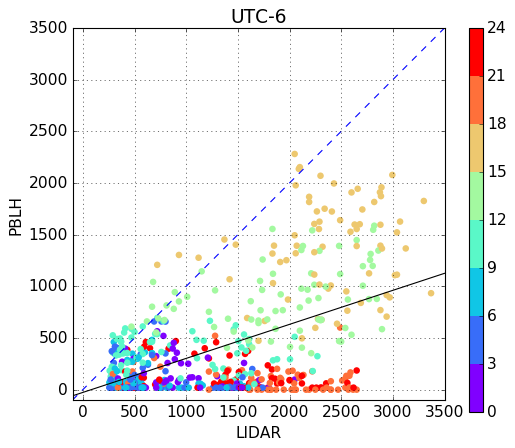

In [34]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Datos
x = month_df.Raw  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = month_df.PBLH_24  #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = (month_df.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

##Ajuste lineal
popt, pcov = optimization.curve_fit(blt.ajuste_lineal, month_df.dropna(thresh=6).Raw, month_df.dropna(thresh=6).PBLH_24) 

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
xx = np.linspace(-100, 3500, 10)

ax.plot(xx, blt.ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
ax.plot(xx, blt.ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
ax.set_title('UTC-6')
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

In [63]:
df_temp = pd.DataFrame(month_df, columns=['Raw', 'PBLH_24'])

In [64]:
month_df.dropna(thresh=6).shape

(599, 8)

In [65]:
df_temp.dropna().shape

(600, 2)

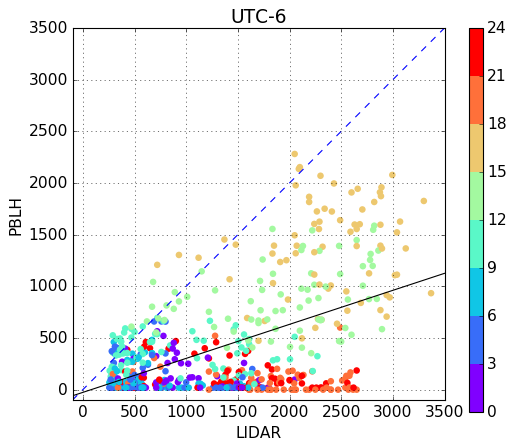

In [49]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# Datos
x = df_temp.Raw  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = df_temp.PBLH_24  #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = (df_temp.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

##Ajuste lineal
popt, pcov = optimization.curve_fit(blt.ajuste_lineal, df_temp.dropna().Raw, df_temp.dropna().PBLH_24) 

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
ax.set_ylim(-100, 3500)
ax.set_xlim(-100, 3500)
ax.set_xlabel('LIDAR')
ax.set_ylabel('PBLH')
xx = np.linspace(-100, 3500, 10)

ax.plot(xx, blt.ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
ax.plot(xx, blt.ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
ax.set_title('UTC-6')
ax.grid()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)

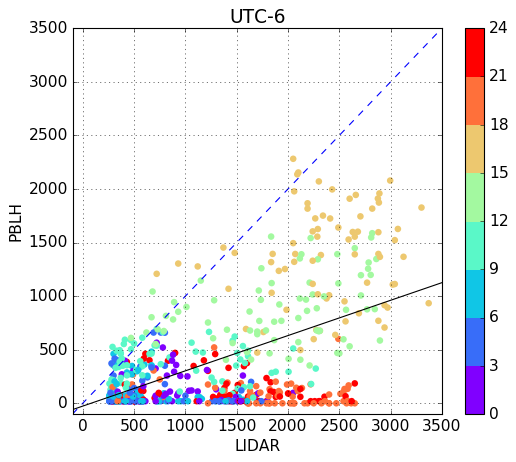

In [74]:
# Datos
x = df_temp.Raw  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
y = df_temp.PBLH_24  #dic_wrf_df.between_time('06:00:00', '23:00:00').PBLH_24
tag = (df_temp.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

##Ajuste lineal
popt, pcov = optimization.curve_fit(blt.ajuste_lineal, df_temp.dropna().Raw, df_temp.dropna().PBLH_24) 

# define the colormap
cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
# extract all colors from the .rainbow map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.linspace(0,24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
plt.figure(figsize=(7,6))

scat = plt.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

# create a second axes for the colorbar
#ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
#cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

#Format
plt.ylim(-100, 3500)
plt.xlim(-100, 3500)
plt.xlabel('LIDAR')
plt.ylabel('PBLH')
xx = np.linspace(-100, 3500, 10)

plt.plot(xx, blt.ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
plt.plot(xx, blt.ajuste_lineal(xx, 0, 1), '--') #Plot identity
plt.rcParams.update({'font.size': 14})
plt.title('UTC-6')
plt.grid()
plt.colorbar()
#ax.set_title('Well defined discrete colors')
#ax2.set_ylabel('Very custom cbar [-]', size=12)
plt.tight_layout()
plt.savefig('prueba.png', format = 'png')

In [52]:
for i in month_df.keys():
    print(i)

PBLH_24
PBLH_48
PBLH_avg_24
PBLH_avg_48
Raw
Filtered
Raw_mean
Filt_mean


In [53]:
keys = ['PBLH_24', 'PBLH_48', 'PBLH_avg_24', 'PBLH_avg_48']

In [57]:
df_temp.head()

                        Raw  PBLH_48
2015-12-01 00:00:00  2020.0  971.577
2015-12-01 01:00:00  1920.0  335.786
2015-12-01 02:00:00  1820.0   85.623
2015-12-01 03:00:00  1860.0   61.861
2015-12-01 04:00:00  1880.0  100.200

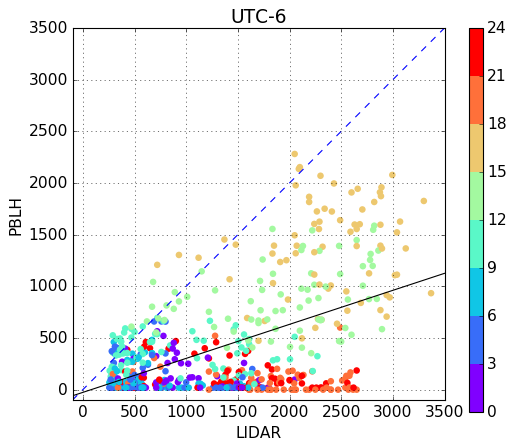

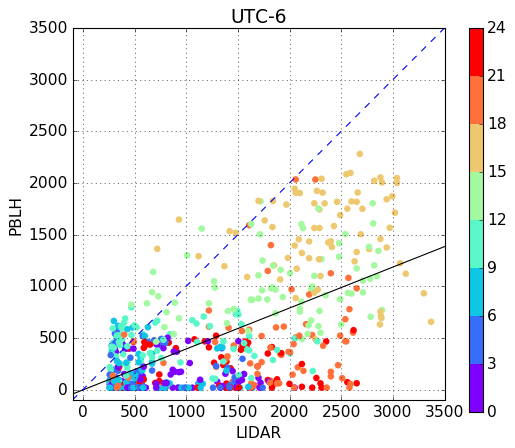

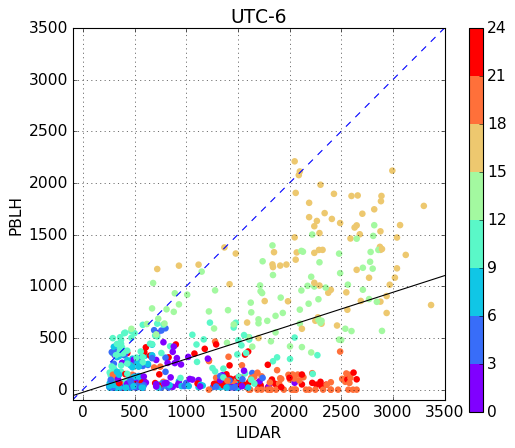

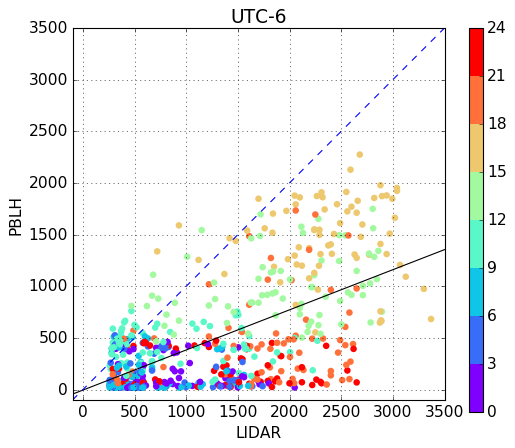

In [61]:
for key in keys:
    df_temp = pd.DataFrame(month_df, columns=['Raw', key])
    fig, ax = plt.subplots(1,1, figsize=(6,6))

    # Datos
    x = df_temp.Raw  #dic_df.asfreq('1H').between_time('06:00:00', '23:00:00').Raw
    y = df_temp[key]  #dic_wrf_df.between_time('06:00:00', '23:00:00')[key]
    tag = (df_temp.index.hour-6)%24#dic_wrf_df.between_time('06:00:00', '23:00:00').index.hour

    ##Ajuste lineal
    popt, pcov = optimization.curve_fit(blt.ajuste_lineal, df_temp.dropna().Raw, df_temp.dropna()[key]) 

    # define the colormap
    cmap = plt.cm.rainbow #matplotlib.colors.ListedColormap(['black','yellow', 'red', 'blue', 'white', 'green'])
    # extract all colors from the .rainbow map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize
    bounds = np.linspace(0,24, 9)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

    # make the scatter
    scat = ax.scatter(x,y, cmap=cmap, norm=norm, c=tag, edgecolors='none', s = 35)

    # create a second axes for the colorbar
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

    #Format
    ax.set_ylim(-100, 3500)
    ax.set_xlim(-100, 3500)
    ax.set_xlabel('LIDAR')
    ax.set_ylabel('PBLH')
    xx = np.linspace(-100, 3500, 10)

    ax.plot(xx, blt.ajuste_lineal(xx, *popt), c = 'k') #plot linear fit
    ax.plot(xx, blt.ajuste_lineal(xx, 0, 1), '--') #Plot identity
    plt.rcParams.update({'font.size': 14})
    ax.set_title('UTC-6')
    ax.grid()
    
    #ax.set_title('Well defined discrete colors')
    #ax2.set_ylabel('Very custom cbar [-]', size=12)

# Gráficas semanales

In [40]:
dic_df = pd.read_csv("/Users/claudiopierard/WRF/Datos/Dataframes/dic_dataframe.csv", index_col=0)
dic_df.index = pd.to_datetime(dic_df.index)

In [41]:
dic_df.head()

                     PBLH_24  PBLH_48  PBLH_avg_24  PBLH_avg_48     Raw  \
2015-12-01 00:00:00    0.000  971.577        0.000     1059.804  2020.0   
2015-12-01 01:00:00  101.725  335.786      104.662      179.144  1920.0   
2015-12-01 02:00:00  131.927   85.623       74.082      101.526  1820.0   
2015-12-01 03:00:00  105.719   61.861       57.011       81.045  1860.0   
2015-12-01 04:00:00   59.337  100.200       33.673      108.101  1880.0   

                     Filtered  Raw_mean  Filt_mean  
2015-12-01 00:00:00    2020.0       NaN        NaN  
2015-12-01 01:00:00    1920.0  2157.143   2157.143  
2015-12-01 02:00:00    1820.0  1525.714   1525.714  
2015-12-01 03:00:00    1860.0  1851.429   1851.429  
2015-12-01 04:00:00    1880.0  1881.429   1881.429  

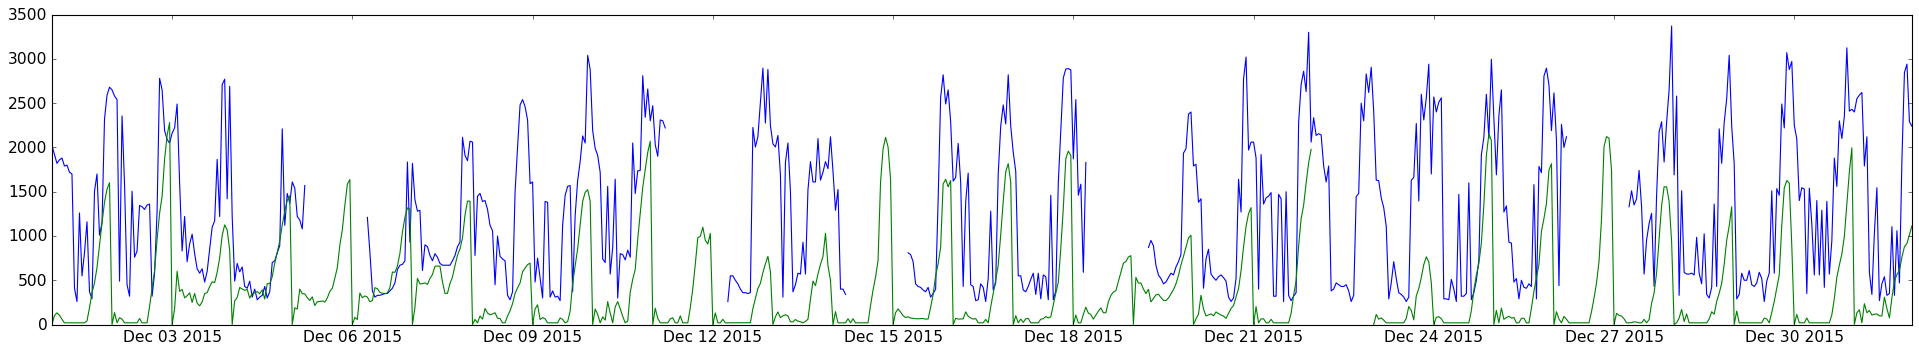

In [42]:
plt.figure(figsize=(30,5))
plt.plot(dic_df.Raw)
plt.plot(dic_df.PBLH_24)

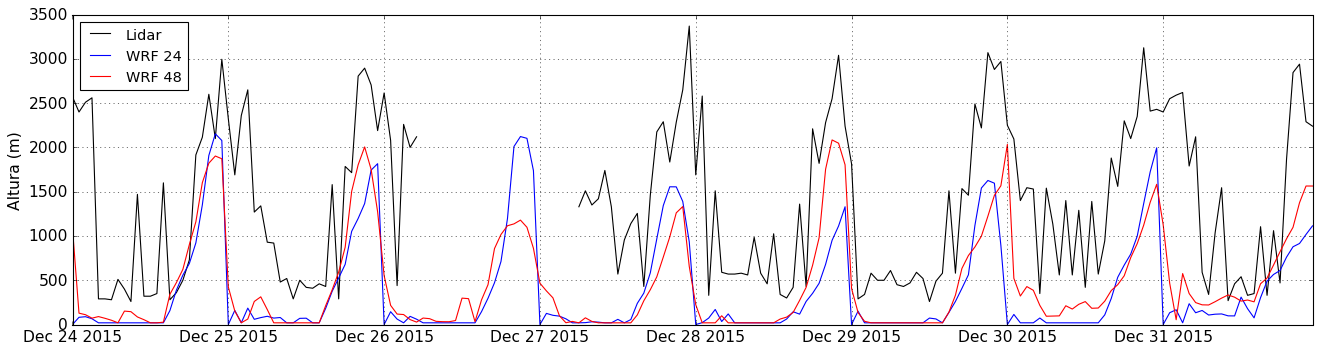

In [87]:
plt.figure(figsize=(20,5))
plt.plot(dic_df['2015-12-24':'2015-12-31'].Raw, c='k', label = 'Lidar')
plt.plot(dic_df['2015-12-24':'2015-12-31'].PBLH_24, c = 'b', label = 'WRF 24')
plt.plot(dic_df['2015-12-24':'2015-12-31'].PBLH_48, c = 'r', label = 'WRF 48')
plt.rcParams.update({'font.size': 14})
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel('Altura (m)')
plt.grid()

-------

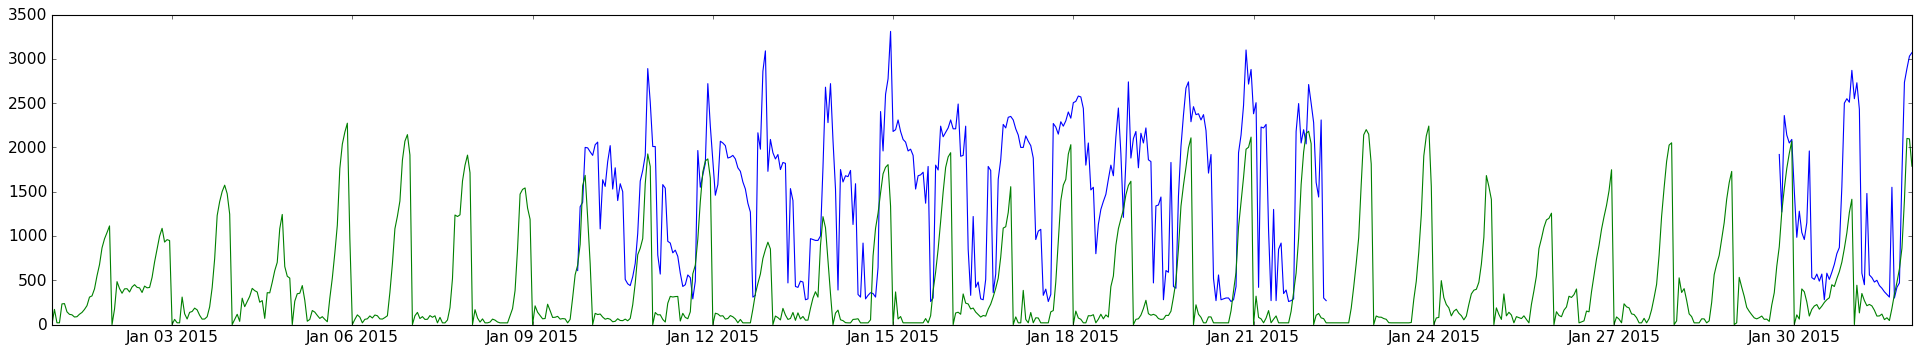

In [44]:
jan_df = pd.read_csv("/Users/claudiopierard/WRF/Datos/Dataframes/jan_dataframe.csv", index_col=0)
jan_df.index = pd.to_datetime(jan_df.index)
plt.figure(figsize=(30,5))
plt.plot(jan_df.Raw)
plt.plot(jan_df.PBLH_24)


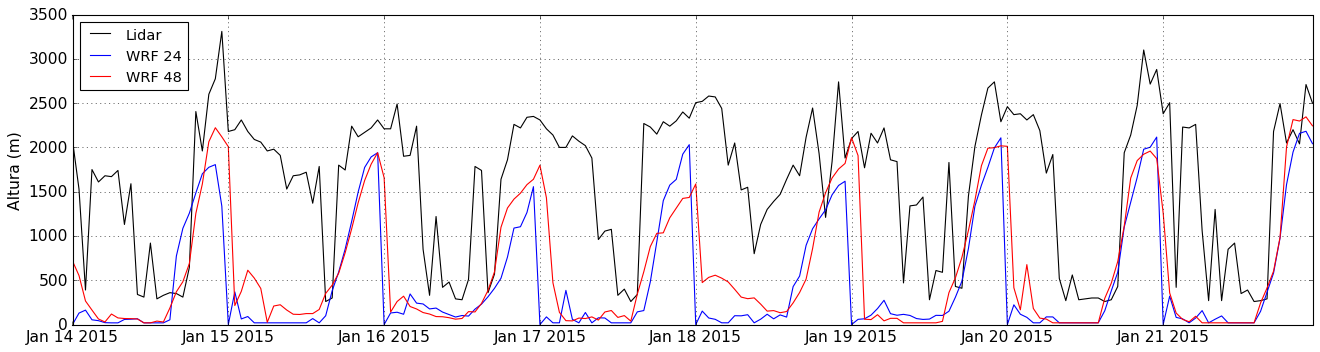

In [82]:
plt.figure(figsize=(20,5))
plt.plot(jan_df['2015-01-14':'2015-01-21'].Raw, label = 'Lidar', c = 'k')
plt.plot(jan_df['2015-01-14':'2015-01-21'].PBLH_24, label = 'WRF 24', c = 'b')
plt.plot(jan_df['2015-01-14':'2015-01-21'].PBLH_48,  label = 'WRF 48', c = 'r')
plt.rcParams.update({'font.size': 14})
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel('Altura (m)')
plt.grid()

------

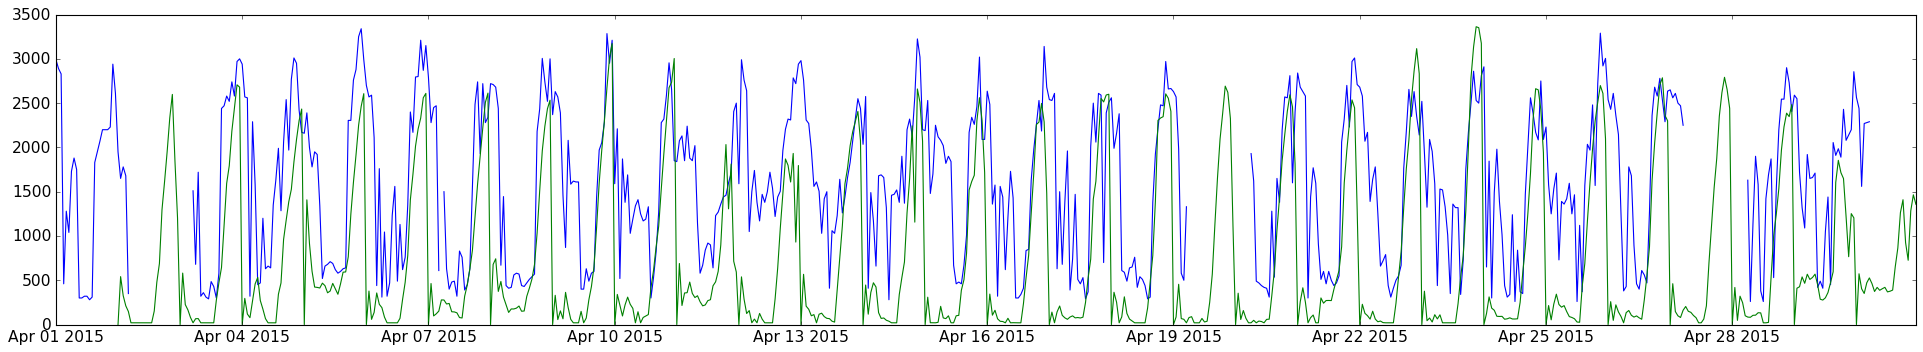

In [57]:
apr_df = pd.read_csv("/Users/claudiopierard/WRF/Datos/Dataframes/apr_dataframe.csv", index_col=0)
apr_df.index = pd.to_datetime(apr_df.index)
plt.figure(figsize=(30,5))
plt.plot(apr_df.Raw)
plt.plot(apr_df.PBLH_24)

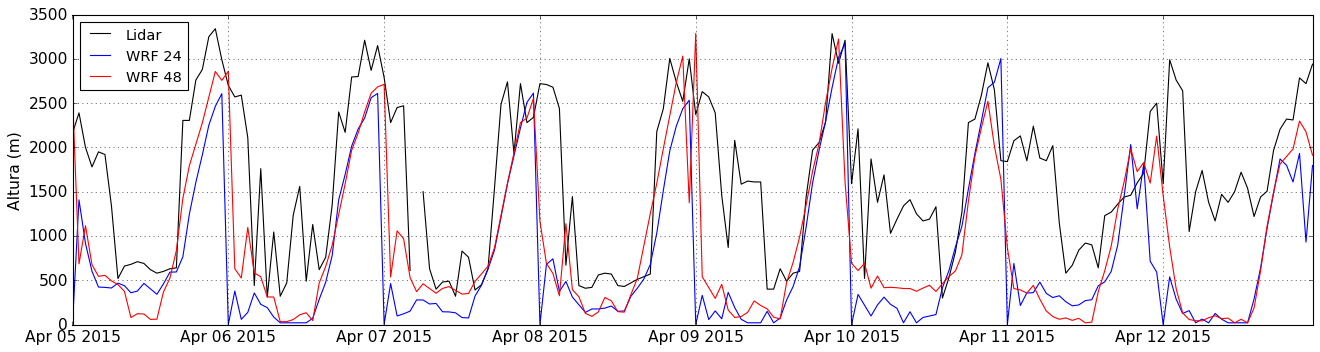

In [86]:
plt.figure(figsize=(20,5))
plt.plot(apr_df['2015-04-05':'2015-04-12'].Raw, label = 'Lidar', c = 'k')
plt.plot(apr_df['2015-04-05':'2015-04-12'].PBLH_24, label = 'WRF 24', c = 'b')
plt.plot(apr_df['2015-04-05':'2015-04-12'].PBLH_48,  label = 'WRF 48', c = 'r')
plt.rcParams.update({'font.size': 14})
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel('Altura (m)')
plt.grid()

-------

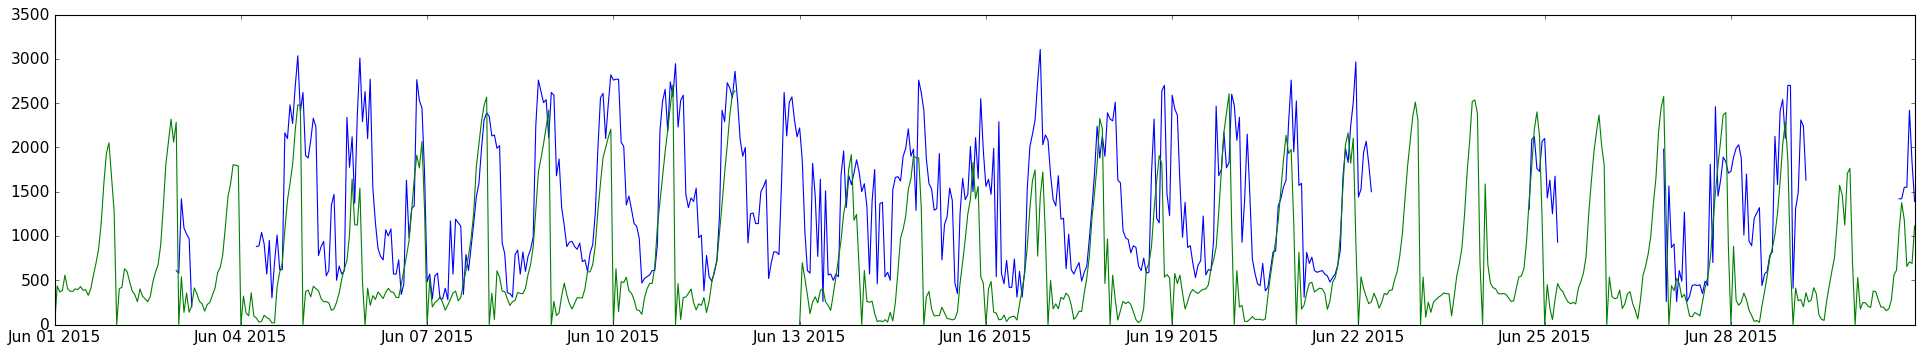

In [70]:
jun_df = pd.read_csv("/Users/claudiopierard/WRF/Datos/Dataframes/jun_dataframe.csv", index_col=0)
jun_df.index = pd.to_datetime(jun_df.index)
plt.figure(figsize=(30,5))
plt.plot(jun_df.Raw)
plt.plot(jun_df.PBLH_24)

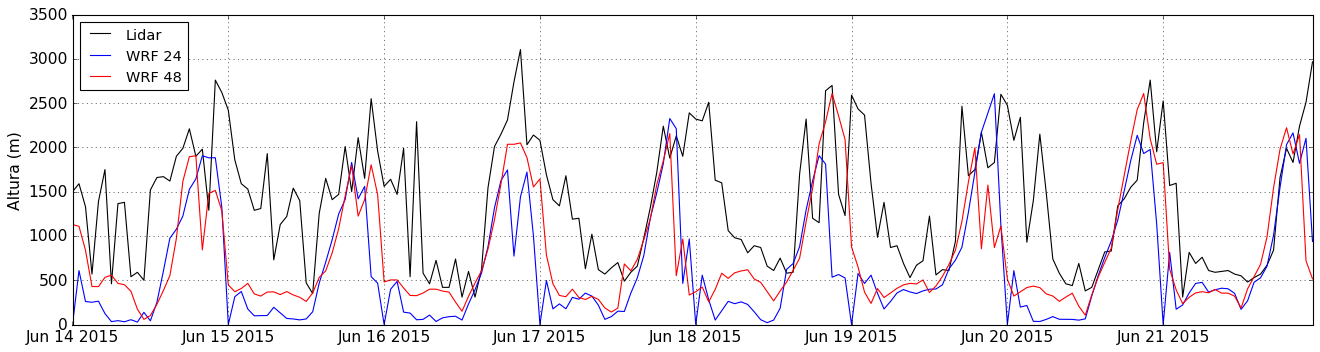

In [85]:
plt.figure(figsize=(20,5))
plt.plot(jun_df['2015-06-14':'2015-06-21'].Raw, label = 'Lidar', c = 'k')
plt.plot(jun_df['2015-06-14':'2015-06-21'].PBLH_24, label = 'WRF 24', c = 'b')
plt.plot(jun_df['2015-06-14':'2015-06-21'].PBLH_48,   label = 'WRF 48', c = 'r')
plt.rcParams.update({'font.size': 14})
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel('Altura (m)')
plt.grid()

------

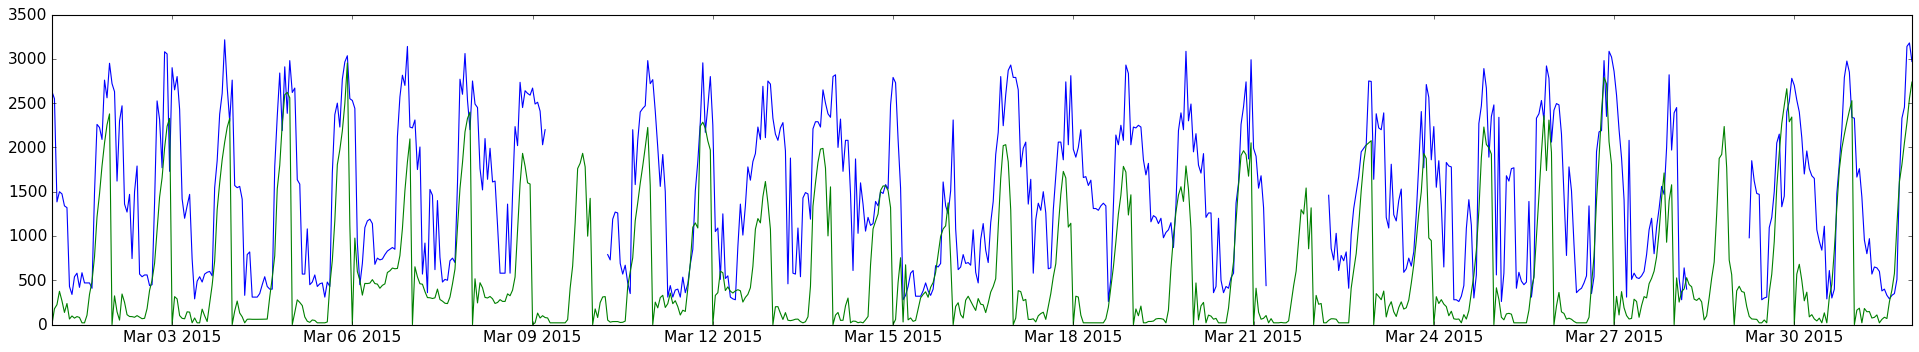

In [73]:
mar_df = pd.read_csv("/Users/claudiopierard/WRF/Datos/Dataframes/mar_dataframe.csv", index_col=0)
mar_df.index = pd.to_datetime(mar_df.index)
plt.figure(figsize=(30,5))
plt.plot(mar_df.Raw)
plt.plot(mar_df.PBLH_24)

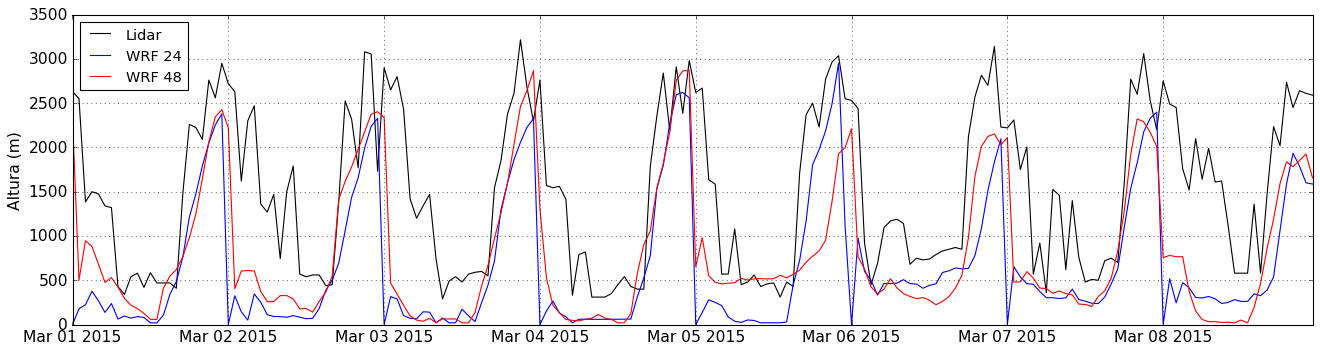

In [84]:
plt.figure(figsize=(20,5))
plt.plot(mar_df['2015-03-01':'2015-03-08'].Raw, label = 'Lidar', c = 'k')
plt.plot(mar_df['2015-03-01':'2015-03-08'].PBLH_24, label = 'WRF 24', c = 'b')
plt.plot(mar_df['2015-03-01':'2015-03-08'].PBLH_48,   label = 'WRF 48', c = 'r')
plt.rcParams.update({'font.size': 14})
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel('Altura (m)')
plt.grid()

-------

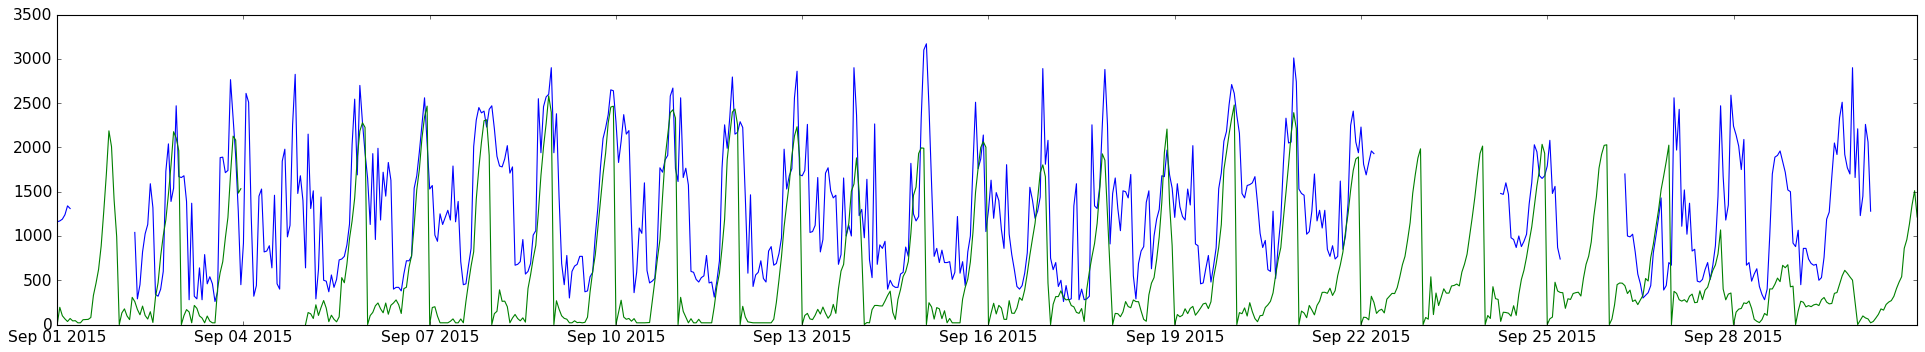

In [75]:
sep_df = pd.read_csv("/Users/claudiopierard/WRF/Datos/Dataframes/sep_dataframe.csv", index_col=0)
sep_df.index = pd.to_datetime(sep_df.index)
plt.figure(figsize=(30,5))
plt.plot(sep_df.Raw)
plt.plot(sep_df.PBLH_24)

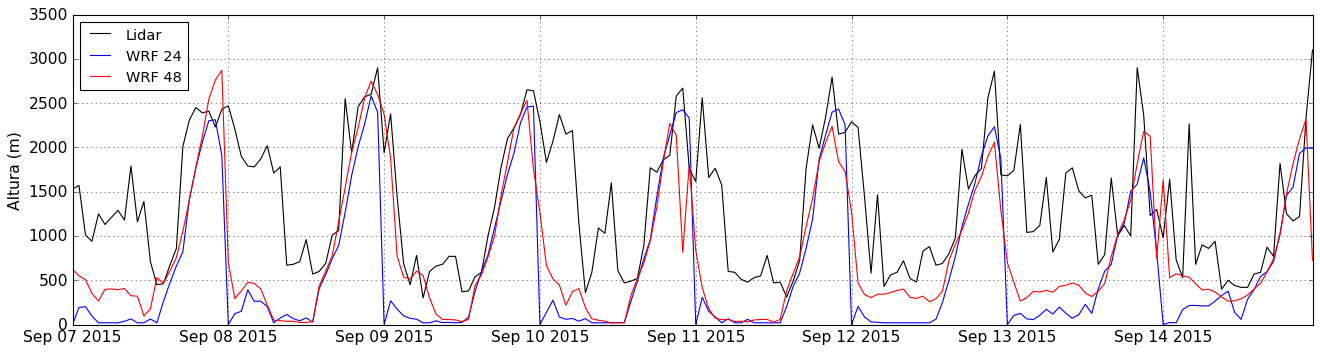

In [83]:
plt.figure(figsize=(20,5))
plt.plot(sep_df['2015-09-07':'2015-09-14'].Raw, label = 'Lidar', c = 'k')
plt.plot(sep_df['2015-09-07':'2015-09-14'].PBLH_24, label = 'WRF 24', c = 'b')
plt.plot(sep_df['2015-09-07':'2015-09-14'].PBLH_48,   label = 'WRF 48', c = 'r')
plt.rcParams.update({'font.size': 14})
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel('Altura (m)')
plt.grid()